# Importing Libraries

In [58]:
import pandas as pd # for handling dataset
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [59]:
df=pd.read_csv('D:\DATATRAINED\DTRND-Project\mushrooms.csv') 
df.head() # to display data from top 5 only  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Dataset Description
1- class : p = poisonous
           e = edible
        
2- capshape 

3- capsurface

4- capcolor

5- bruises

6- odor

7- gill attachment

8- gill spacing

9- gill size

10- gill color

11- stalk-shape

12- stalk-surface-above-ring

13- stalk-surface-below-ring 

14- stalk-color-above-ring

15- stalk-color-below-ring 

16- veil-type 

17- veil-color

18- ring-number

19- ring-type

20- spore-print-color

21- population

22- habitat

In [60]:
df.shape  # to display total no of rows & columns

(8124, 23)

In [61]:
df.columns # to display all columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [62]:
df.isnull().sum() # Checking null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [64]:
df.describe() # to get high level idea of dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [65]:
# dropping unnecessary columns
df=df.drop(columns=['veil-type'])

<AxesSubplot:xlabel='class', ylabel='count'>

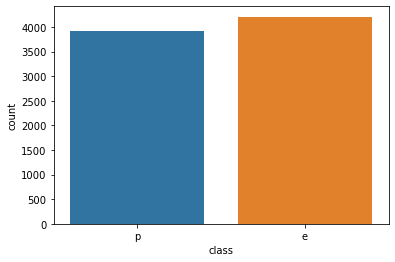

In [66]:
sns.countplot(df['class']) # to visualize no of poisonous(p) and edible(e) counts in a bar graph way

In [67]:
df['class'].value_counts() # to count numbers of p & e

e    4208
p    3916
Name: class, dtype: int64

In [68]:
# converting columns to integer formats using label encoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [69]:
y=df['class']
x=df.drop('class', axis=1)

In [70]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [ ]:
# Finding variance inflation factor in each scaled column i.e x_scaled.shape[1] (1/(1-R2))

In [72]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif["features"] = x.columns

#let's check the values
vif

,vif,features
0,1.043031,cap-shape
1,1.254300,cap-surface
2,1.566327,cap-color
3,6.172082,bruises
4,1.839415,odor
5,6.956323,gill-attachment
6,4.107406,gill-spacing
7,3.995689,gill-size
8,2.294605,gill-color
9,4.640069,stalk-shape


## bruises,gill-attachment,veil-color,ring-type,spore-print-color has strong multicollinearity

In [ ]:
# Using Decision Tree Classifier

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 25)

In [74]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [75]:
clf.score(x_train,y_train)

1.0

In [76]:
y_pred = clf.predict(x_test)

In [77]:
clf.score(x_test,y_test)

1.0

In [78]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

1.0

In [79]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

1.0